# Language Models
### Authors: Rachid Riad, Julien Karadayi, Emmanuel Dupoux
#### Goals: 
- Small exercice and vizualizations with Weigthed Finite State Transducers
- Implementation: Edit Distance/Levenshtein with Finite State Transducers 
- Going Further with Composition of FSTs: Detect mispelled words/Generate candidate words 
- The basics of `Kaldi/Abkhazia` ASR tool, different language models, dictionnary

#### Dataset:
- Dictionary
- Librispeech

#### Softwares:
- Openfst/Pywrapfst
- Kaldi/Abkhazia


In [28]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import os
import subprocess

import abkhazia
import pywrapfst as fst

### I) Openfst / Pywrapfst
The OpenFst library is a C++ template library. It is a library for constructing, combining, optimizing, and searching weighted finite-state transducers (FSTs) The C++ code is used in many speech applications, and has been developped by NYU Courant Institute and Google Research. 

A link to the C++ api and the possible operations http://www.openfst.org/twiki/bin/view/FST/FstQuickTour#CreatingFsts

General Hint: Take a look at the jupyter notebook for the slides, for some questions you need to convert fst to fsa and vice-versa, unweight, add weights... To get help you also have the command `help` from python.



#### Exercice 1) Basic operations on Finite State Transducers (FSTs)

a) Build a finite state transducer that converts a sequence in Upercase to Lowercase with input vocubaluary $\Sigma = \{A,B\}$, and output vocabulary $\Omega = \{a,b\}$

Hint: **Use an unweigthed transducer**

b) Now, you want to to be able to handle, in addition to $\Sigma = \{A,B\}$, extra symbols in your input sequence such as $\{@,a,b,!,1,2,\_,-,\}$ how to modify the precedent transducer to do so?

c) Use the **Union** operation to answer the previous question.

d) You do not want to support anymore the numeric characters, $\{1,2\}$, remove them with the **Difference** operation between two chosen FSTs.

Hint: **The second FST needs to be a FSA epsilon-free deterministic.**

e) Now, you want to go directly from $\Sigma = \{A,B\}$ to $\Delta = \{\alpha,\beta\}$, use the **Composition** operation, a previous built FST a new one to have such a FST.

In [2]:
upper_table = fst.SymbolTable(name = "uppercase")
lower_table = fst.SymbolTable(name = "lowercase")
uppercases = ['ε', 'A', 'B']
lowercases = ['ε', 'b', 'a']

for idx, letter in enumerate(uppercases):
    upper_table.add_symbol(symbol = letter, key = idx)
    print (upper_table.find(idx))
    
for idx, letter in enumerate(lowercases):
    lower_table.add_symbol(symbol = letter, key = idx)
    print (lower_table.find(idx))

ε
A
B
ε
b
a


#### Exercice 1 - a

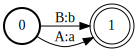

In [3]:
ex_1a = fst.Fst()
ex_1a.reserve_states(2)  # Optional.
s = ex_1a.add_state()
ex_1a.set_start(s)
n = ex_1a.add_state()
ex_1a.reserve_arcs(s, 2)  # Optional.
ex_1a.add_arc(s, fst.Arc(2, 1, 0, n))
ex_1a.add_arc(s, fst.Arc(1, 2, 0, n))
ex_1a.set_final(n, 0)
ex_1a.set_input_symbols(upper_table)
ex_1a.set_output_symbols(lower_table)
ex_1a

#### Exercice 1 - b

In [4]:
extended_table = fst.SymbolTable(name = "extended")
extended = ['ε', 'A', 'B', '@', 'a', 'b', '!', '1', '2', '_', '-']

for idx, char in enumerate(extended):
    extended_table.add_symbol(symbol = char, key = idx)
    print (char)

ε
A
B
@
a
b
!
1
2
_
-


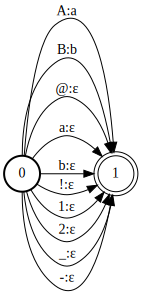

In [5]:
ex_1b = fst.Fst()
ex_1b.reserve_states(2)  # Optional.
s = ex_1b.add_state()
ex_1b.set_start(s)
ex_1b.reserve_states(1)  # Optional.
n = ex_1b.add_state()
ex_1b.reserve_arcs(s, 10)  # Optional.
ex_1b.add_arc(s, fst.Arc(1, 2, 0, n))
ex_1b.add_arc(s, fst.Arc(2, 1, 0, n))
ex_1b.add_arc(s, fst.Arc(3, 0, 0, n))
ex_1b.add_arc(s, fst.Arc(4, 0, 0, n))
ex_1b.add_arc(s, fst.Arc(5, 0, 0, n))
ex_1b.add_arc(s, fst.Arc(6, 0, 0, n))
ex_1b.add_arc(s, fst.Arc(7, 0, 0, n))
ex_1b.add_arc(s, fst.Arc(8, 0, 0, n))
ex_1b.add_arc(s, fst.Arc(9, 0, 0, n))
ex_1b.add_arc(s, fst.Arc(10, 0, 0, n))
ex_1b.set_final(n, 0)
ex_1b.set_input_symbols(extended_table)
ex_1b.set_output_symbols(lower_table)
ex_1b

#### Exercice 1 - c

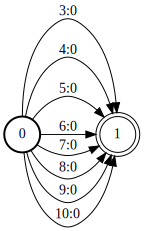

In [6]:
union_a = fst.Fst()
union_a.reserve_states(2)  # Optional.
s = union_a.add_state()
union_a.set_start(s)
n = union_a.add_state()
union_a.reserve_arcs(s, 2)  # Optional.
union_a.add_arc(s, fst.Arc(2, 1, 0, n))
union_a.add_arc(s, fst.Arc(1, 2, 0, n))
union_a.set_final(n, 0)

union_c = fst.Fst()
union_c.reserve_states(2)  # Optional.
s = union_c.add_state()
union_c.set_start(s)
n = union_c.add_state()
union_c.reserve_arcs(s, 8)  # Optional.
union_c.add_arc(s, fst.Arc(3, 0, 0, n))
union_c.add_arc(s, fst.Arc(4, 0, 0, n))
union_c.add_arc(s, fst.Arc(5, 0, 0, n))
union_c.add_arc(s, fst.Arc(6, 0, 0, n))
union_c.add_arc(s, fst.Arc(7, 0, 0, n))
union_c.add_arc(s, fst.Arc(8, 0, 0, n))
union_c.add_arc(s, fst.Arc(9, 0, 0, n))
union_c.add_arc(s, fst.Arc(10, 0, 0, n))
union_c.set_final(n)
# ex_1c.set_input_symbols(extended_table)
# ex_1c.set_output_symbols(lower_table)
union_c

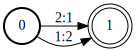

In [7]:
union_a

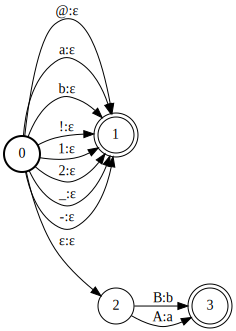

In [8]:
union = union_c.union(union_a)
union
union.set_input_symbols(extended_table)
union.set_output_symbols(lower_table)

#### Exercice 1 - d

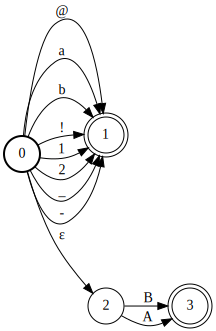

In [9]:
fsa_union_a = fst.Fst()
fsa_union_a.reserve_states(2)  # Optional.
s = fsa_union_a.add_state()
fsa_union_a.set_start(s)
n = fsa_union_a.add_state()
fsa_union_a.reserve_arcs(s, 2)  # Optional.
fsa_union_a.add_arc(s, fst.Arc(2, 2, 0, n))
fsa_union_a.add_arc(s, fst.Arc(1, 1, 0, n))
fsa_union_a.set_final(n, 0)

fsa_union_c = fst.Fst()
fsa_union_c.reserve_states(2)  # Optional.
s = fsa_union_c.add_state()
fsa_union_c.set_start(s)
n = fsa_union_c.add_state()
fsa_union_c.reserve_arcs(s, 8)  # Optional.
fsa_union_c.add_arc(s, fst.Arc(3, 3, 0, n))
fsa_union_c.add_arc(s, fst.Arc(4, 4, 0, n))
fsa_union_c.add_arc(s, fst.Arc(5, 5, 0, n))
fsa_union_c.add_arc(s, fst.Arc(6, 6, 0, n))
fsa_union_c.add_arc(s, fst.Arc(7, 7, 0, n))
fsa_union_c.add_arc(s, fst.Arc(8, 8, 0, n))
fsa_union_c.add_arc(s, fst.Arc(9, 9, 0, n))
fsa_union_c.add_arc(s, fst.Arc(10, 10, 0, n))
fsa_union_c.set_final(n)

fsa_union = fsa_union_c.union(fsa_union_a)
fsa_union
fsa_union.set_input_symbols(extended_table)

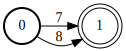

In [10]:
# Fsa to remove from fsa_union
to_remove = fst.Fst()
to_remove.reserve_states(2)  # Optional.
s = to_remove.add_state()
to_remove.set_start(s)
n = to_remove.add_state()
to_remove.reserve_arcs(s, 2)  # Optional.
to_remove.add_arc(s, fst.Arc(extended.index('1'), extended.index('1'), 0, n))
to_remove.add_arc(s, fst.Arc(extended.index('2'), extended.index('2'), 0, n))
to_remove.set_final(n, 0)
to_remove = fst.determinize(to_remove)
to_remove

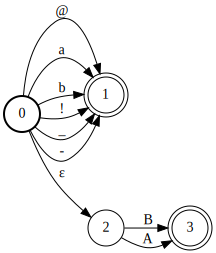

In [11]:
# difference
fst.difference(fsa_union, to_remove)

#### Exercice 1 - e

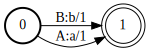

In [12]:
ex_1a = fst.Fst()
ex_1a.reserve_states(2)  # Optional.
s = ex_1a.add_state()
ex_1a.set_start(s)
n = ex_1a.add_state()
ex_1a.reserve_arcs(s, 2)  # Optional.
ex_1a.add_arc(s, fst.Arc(2, 1, 1, n))
ex_1a.add_arc(s, fst.Arc(1, 2, 1, n))
ex_1a.set_final(n, 0)
ex_1a.set_input_symbols(upper_table)
ex_1a.set_output_symbols(lower_table)
ex_1a

In [13]:
output_table = fst.SymbolTable(name = "output")
output = ['ε', 'α', 'β']

for idx, char in enumerate(output):
    output_table.add_symbol(symbol = char, key = idx)
    print (char)

ε
α
β


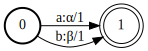

In [14]:
ex_1d = fst.Fst()
ex_1d.reserve_states(2)  # Optional.
s = ex_1d.add_state()
ex_1d.set_start(s)
n = ex_1d.add_state()
ex_1d.reserve_arcs(s, 2)  # Optional.
ex_1d.add_arc(s, fst.Arc(2, 1, 1, n))
ex_1d.add_arc(s, fst.Arc(1, 2, 1, n))
ex_1d.set_final(n, 0)
ex_1d.set_input_symbols(lower_table)
ex_1d.set_output_symbols(output_table)

In [15]:
res = fst.compose(ex_1a, ex_1d)


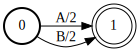

In [16]:
res

#### Exercice 2) Edit Distance and Weighted Finite State Transducers (WFSTs)

It is possible to compute the usual [Levenshtein distance or Edit Distance](https://en.wikipedia.org/wiki/Levenshtein_distance) with Weighted Finite State Transducers. 
In the cell below, it is an example of the operations to compute the Edit Distance with only additions taken into account for basic sequences from this Vocabulary $\Sigma = \{0,1\}$. You use the composition twice: $ S_1 \circ EditFST \circ S_2$. You obtain the Graph FST of all possible paths to go from one sequence to the other. Then you use the shortest path to obtain the Edit Distance.

a) In this part the vocabulary of the Language is $\Sigma = \{h,o,m,l,a,c, g\}$. Build a transducer for the **Edit Distance with the additions, substitutions and deletions**. You should use a small code snippet to not type everything by hands. Provide an explanation of the resulting weights and input/output transitions.

Hint: **Introduce some intermediate transitions type if too long to type**

Any comments on the occupied memory for the WFST and $|\Sigma|$? Do you have a solution to reduce it? 
You are solving a **shortest-path problem in a graph with non-negative weights** to compute the finale edit distance. In the case of Edit Distance in linguistics, which algorithm should you use ? Justify your choice. 

b) Now, you are provided with a dictionnary of correct words. You want to detect the **misspelled words** in a text. The naive way without FST is to check whether or not each word of a text is present in the words vocabulary. 

Another way is: 

0) Build a FST of your input text where each word is represented by a path 

1) Compose your text FST with the dictionnary FST. You obtain only the intersection of the input words and dictonnary words. 

2) Use the difference operation between the obtained FST and the input FST to obtain the mispelled words. Here is a FST with correct spelled words. Could you show some text inputs and use the previously described operation to detect misspelled ones.

Your vocabulary for this question is dict = {'coml','almanach'}, the text with mispells is T = 'cogml coml almanach lomh comll lamanach cocoml'. 

Hint: **Use only unweighted FSAs for this question b)**

c) How can you use the Edit Distance WFST and the dictionnary to correct mispelled words?  

d) Bonus - **confusion matrix** : When you are typing on your Qwerty keyboard you are less likely to make the mistake $s \rightarrow p$ than $s \rightarrow d $.  When you use a recognizer of tri-phones, the algorithm is less likely to make non-valid phonotactically mistakes of never seen sequences. Imagine you are provided a confusion matrix with different penalties weights, how can you adapt your WFST in consequences?



In [17]:
print ('test &\#949;')

test &\#949;


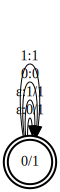

In [18]:
alphabet = ['&#949;', '0','1']
alphabet_table = fst.SymbolTable(name='Boolean')
for idx,element in enumerate(alphabet):
    alphabet_table.add_symbol(symbol=element,key=idx)

# Edit distance with FST: only additions
add_fst = fst.Fst()
add_fst.reserve_states(1)  # Optional.
s = add_fst.add_state()
add_fst.set_start(s)
add_fst.add_arc(s, fst.Arc(0, 1, 1.0, s))
add_fst.add_arc(s, fst.Arc(0, 2, 1.0, s))
add_fst.add_arc(s, fst.Arc(1, 1, 0.0, s))
add_fst.add_arc(s, fst.Arc(2, 2, 0.0, s))
add_fst.set_final(s, 1)
add_fst.set_input_symbols(alphabet_table)
add_fst.set_output_symbols(alphabet_table)
add_fst

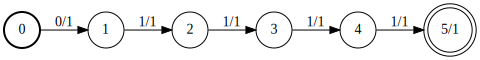

In [19]:
# Two sequences 011 and 01111 represented by FSTs
# 011
sequence1 = fst.Fst()
sequence1.reserve_states(3)
s = sequence1.add_state()
sequence1.set_start(s)
n = sequence1.add_state()
sequence1.add_arc(s, fst.Arc(1, 1, 1.0, n))
s = n
n = sequence1.add_state()
sequence1.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence1.add_state()
sequence1.add_arc(s, fst.Arc(2, 2, 1.0, n))
sequence1.set_final(n, 1)
sequence1.set_input_symbols(alphabet_table)
sequence1.set_output_symbols(alphabet_table)

# 01111
sequence2 = fst.Fst()
sequence2.reserve_states(5)
s = sequence2.add_state()
sequence2.set_start(s)
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(1, 1, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence2.add_state()
sequence2.add_arc(s, fst.Arc(2, 2, 1.0, n))
sequence2.set_final(n, 1)
sequence2.set_input_symbols(alphabet_table)
sequence2.set_output_symbols(alphabet_table)

# help(fst.Weight)

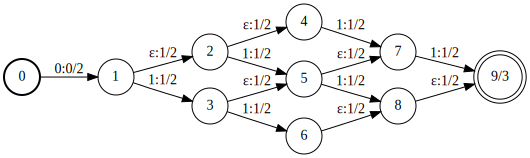

In [20]:
# All possible paths with additions from one sequence to the other...
full_model = fst.compose(fst.compose(sequence1,add_fst),sequence2)
full_model

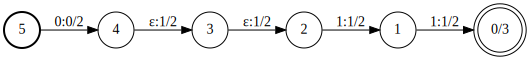

In [21]:
fst.shortestpath(full_model)

#### Exercice 2 - a

In [22]:
alphabet = ['h', 'o', 'm', 'l', 'a', 'c', 'g']
alphabet_table = fst.SymbolTable(name='alphabet')
for idx, char in enumerate(['&#949;'] + alphabet):
    alphabet_table.add_symbol(symbol=char,key=idx)
    print (char)

&#949;
h
o
m
l
a
c
g


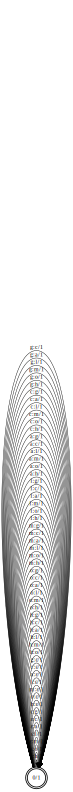

In [23]:
# Edit distance with FST: only additions
ex_2a_fst = fst.Fst()
ex_2a_fst.reserve_states(1)  # Optional.
s = ex_2a_fst.add_state()
ex_2a_fst.set_start(s)

# Deletions
for char in alphabet:
    ex_2a_fst.add_arc(s, fst.Arc(0, alphabet.index(char) + 1, 1.0, s))

# Additions
for char in alphabet:
    ex_2a_fst.add_arc(s, fst.Arc(alphabet.index(char) + 1, 0, 1.0, s))

# Substitutions
for char_1 in alphabet:
    for char_2 in alphabet:
        if char_1 != char_2:
            ex_2a_fst.add_arc(s, fst.Arc(alphabet.index(char_1) + 1,
                                       alphabet.index(char_2) + 1,
                                       1.0,
                                       s)
                           )
    
ex_2a_fst.set_final(s, 1)
ex_2a_fst.set_input_symbols(alphabet_table)
ex_2a_fst.set_output_symbols(alphabet_table)
ex_2a_fst

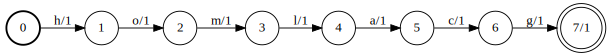

In [24]:
# alphabet = ['h', 'o', 'm', 'l', 'a', 'c', 'g']
sequence_1 = fst.Fst()
sequence_1.reserve_states(7)
s = sequence_1.add_state()
sequence_1.set_start(s)
n = sequence_1.add_state()
sequence_1.add_arc(s, fst.Arc(1, 1, 1.0, n))
s = n
n = sequence_1.add_state()
sequence_1.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = sequence_1.add_state()
sequence_1.add_arc(s, fst.Arc(3, 3, 1.0, n))
s = n
n = sequence_1.add_state()
sequence_1.add_arc(s, fst.Arc(4, 4, 1.0, n))
s = n
n = sequence_1.add_state()
sequence_1.add_arc(s, fst.Arc(5, 5, 1.0, n))
s = n
n = sequence_1.add_state()
sequence_1.add_arc(s, fst.Arc(6, 6, 1.0, n))
s = n
n = sequence_1.add_state()
sequence_1.add_arc(s, fst.Arc(7, 7, 1.0, n))
sequence_1.set_final(n, 1)
sequence_1.set_input_symbols(alphabet_table)
sequence_1.set_output_symbols(alphabet_table)


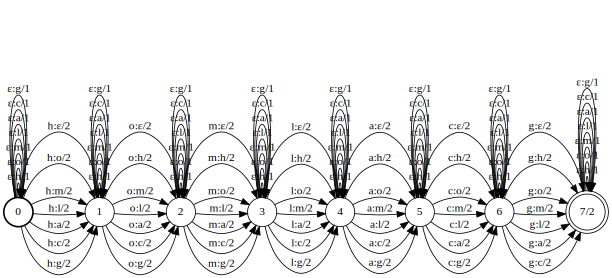

In [25]:
# Represent all the possible string we can edit 'homlacg' into
fst.compose(sequence_1, ex_2a_fst)

#### Exercice 2 - b

In [27]:
dico = ['coml','almanach']
T = 'cogml coml almanach lomh comll lamanach cocoml'


##### Dictionary FST

In [30]:
dico_table = fst.SymbolTable(name = "dico")
for idx, word in enumerate(['&#949;'] + dico):
    dico_table.add_symbol(symbol=word, key=idx)
    print (word)

&#949;
coml
almanach


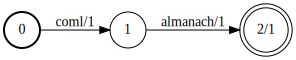

In [45]:
dico_fst = fst.Fst()
dico_fst.reserve_states(3)
s = dico_fst.add_state()
dico_fst.set_start(s)
n = dico_fst.add_state()
dico_fst.add_arc(s, fst.Arc(1, 1, 1.0, n))
s = n
n = dico_fst.add_state()
dico_fst.add_arc(s, fst.Arc(2, 2, 1.0, n))
dico_fst.set_final(n, 1)
dico_fst.set_input_symbols(dico_table)
dico_fst.set_output_symbols(words_table)

##### FST Of input text

In [31]:
words = ['cogml', 'coml', 'almanach', 'lomh', 'comll', 'lamanach', 'cocoml']
words_table = fst.SymbolTable(name='alphabet')
for idx, word in enumerate(['&#949;'] + words):
    words_table.add_symbol(symbol=word,key=idx)
    print (word)

&#949;
cogml
coml
almanach
lomh
comll
lamanach
cocoml


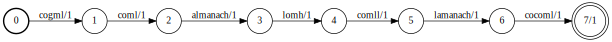

In [46]:
text = fst.Fst()
text.reserve_states(8)
s = text.add_state()
text.set_start(s)
n = text.add_state()
text.add_arc(s, fst.Arc(1, 1, 1.0, n))
s = n
n = text.add_state()
text.add_arc(s, fst.Arc(2, 2, 1.0, n))
s = n
n = text.add_state()
text.add_arc(s, fst.Arc(3, 3, 1.0, n))
s = n
n = text.add_state()
text.add_arc(s, fst.Arc(4, 4, 1.0, n))
s = n
n = text.add_state()
text.add_arc(s, fst.Arc(5, 5, 1.0, n))
s = n
n = text.add_state()
text.add_arc(s, fst.Arc(6, 6, 1.0, n))
s = n
n = text.add_state()
text.add_arc(s, fst.Arc(7, 7, 1.0, n))
text.set_final(n, 1)
text.set_input_symbols(words_table)
text.set_output_symbols(words_table)


In [51]:
# Composing not functioning
fst.compose(dico_fst, text)

### II) Kaldi / Abkhazia

The goal of this part is to train different language models, and understand the influence of the parameters. This exercice is more open and we wait explanations and interpretations of the results.

Kaldi is a C++ library developed by John Hopkins University, and is used by several of the main assistants, Siri of Apple, Alexa of Amazon.
Abkhazia is a python library around Kaldi for an easier use.

#### Exercice 3 Language models and N-grams
One acoustic model has been pre-trained, at word level. You can see the paramaters of the acoustic model with the command `help(abkhazia.acoustic)`.  

Below, you will find commands to 1) Load the corpus 2) Train a simple lanugage model 3) Decode a corpus with it
You can find the models here : `/home/vagrant/models`
You can have access to all parameters for the language model with `help(abkhazia.language)` 
You can find find the results per utterance here : `decode/scoring_kaldi/wer_details/per_utt`

a) Can you explain the parameters based on the lecture class?

b) Can you try different the different pre-trained acoustic models?

c) What are the more important parameters for the model, what are the advantages and drawbacks of different modelizations? Complexity, Sparsity, Time computations, etc...

d) Can you vizualize some parts of the grammar `G.fst` for one of your experiment and explain in terms of Weigthed Finite State Transducers the parameters.

e) Bonus: What is `L.fst`? 

f) Can you make a quick summary of the whole pipeline to have an ASR system?

a)
+ word-level language or phone-level language model decides the nature of the hidden states considered.
+ position_dependent_phones is linked to cooccurence of phonemes, which is something really important to get a proper model, but increase the complexity of the model
+ silence_probability is important to model the inter-word silence. If 0, then consider every every computations. Else, only consider "spoken" parts

b) The best-WER is given with $1.5\%$, when the best world score are arround $10\%$. It's strange

c) The word level produces better WER, but the model obtained is more sparse and more complex.

d) / e) Not possible to vizualize G.fst. fstdraw is not available on the available VM

f) An ASR system aims at solving the following decoding problem:

$$
W^* = \arg \max_W p(O \mid W, \theta)
$$
$$
p(O \mid W, \theta) = p(O\mid Q) p(Q \mid W) p(W)
$$
+ Extraction of cepstral features / MFCC
+ Acousitc model $p(O\mid Q)$
+ Pronounciation model $p(Q \mid W)$
+ Language model $p(W)$



In [58]:
help(abkhazia.language.LanguageModel)

In [2]:
import abkhazia
import abkhazia.acoustic
import abkhazia.language
help(abkhazia.language.language_model)

Help on module abkhazia.language.language_model in abkhazia.language:

NAME
    abkhazia.language.language_model - Provides the LanguageModel class

FILE
    /home/vagrant/anaconda/lib/python2.7/site-packages/abkhazia-0.3-py2.7.egg/abkhazia/language/language_model.py

CLASSES
    abkhazia.abstract_recipe.AbstractRecipe(abkhazia.utils.abkhazia_base.AbkhaziaBase)
        LanguageModel
    
    class LanguageModel(abkhazia.abstract_recipe.AbstractRecipe)
     |  Compute a language model from an abkhazia corpus
     |  
     |  This class uses Kaldi, IRSTLM and SRILM to compute n-grams
     |  language models from any abkhazia speech corpus. The models can be
     |  either at word or phone level.
     |  
     |  Parameters
     |  ----------
     |  
     |  corpus (abkhazia.corpus.Corpus): the abkhazia corpus to process
     |  
     |  output_dir (path): output directory to create with results
     |  
     |  level (str): Can be either 'phone' or 'word' and compute either a
     |    

In [5]:
import abkhazia.utils as utils
import abkhazia.commands.abstract_command 
import abkhazia.corpus 

In [24]:
corpus_dir = "/home/vagrant/models/corpus_francais/data"
output_dir_lm = "/home/vagrant/models/exp1_example/language_model"
log = abkhazia.utils.logger.get_log(
    os.path.join(output_dir_lm, 'language.log'), verbose=True)

## Load corpus in abkhazia format
corpus = abkhazia.corpus.Corpus.load(corpus_dir, validate=True, log=log)

## Instanciate the lm recipe and compute the LM
recipe = abkhazia.language.LanguageModel(
    corpus, output_dir_lm, log=log,
    order=2, level='word',
    position_dependent_phones=False,
    silence_probability=0.5)
recipe.delete_recipe = False
recipe.compute()



In [25]:
## Decode step
# paths
corpus = "/home/vagrant/models/corpus_francais"
features = "/home/vagrant/models/features"
acoustic = "/home/vagrant/models/am_trisa_word"
output_dir_decode = "/home/vagrant/models/exp1_example/decode"
# corpus is different from corpus_dir as the line commands adss automaticaly '/data/'

# command
cmd = ["abkhazia", "decode", "sa", corpus,
       "-o", output_dir_decode, "-l", output_dir_lm,
       "-f", features, "-a", acoustic, "--recipe",
       "--verbose",'--force']
print ' '.join(cmd)
process = subprocess.Popen(cmd, shell=False)
process.wait()

0

In [26]:
corpus_dir = "/home/vagrant/models/corpus_francais/data"
output_dir_lm = "/home/vagrant/models/exp2_example/language_model"
log = abkhazia.utils.logger.get_log(
    os.path.join(output_dir_lm, 'language.log'), verbose=True)

## Load corpus in abkhazia format
corpus = abkhazia.corpus.Corpus.load(corpus_dir, validate=True, log=log)

## Instanciate the lm recipe and compute the LM
recipe = abkhazia.language.LanguageModel(
    corpus, output_dir_lm, log=log,
    order=2, level='word',
    position_dependent_phones=False,
    silence_probability=0.5)
recipe.delete_recipe = False
recipe.compute()



In [27]:
## Decode step
# paths
corpus = "/home/vagrant/models/corpus_francais"
features = "/home/vagrant/models/features"
acoustic = "/home/vagrant/models/am_trisa_word"
output_dir_decode = "/home/vagrant/models/exp2_example/decode"
# corpus is different from corpus_dir as the line commands adss automaticaly '/data/'

# command
cmd = ["abkhazia", "decode", "sa", corpus,
       "-o", output_dir_decode, "-l", output_dir_lm,
       "-f", features, "-a", acoustic, "--recipe",
       "--verbose",'--force']
print ' '.join(cmd)
process = subprocess.Popen(cmd, shell=False)
process.wait()

0

In [ ]:
G